## Introduction

## Loading Data

In [1]:
import scanalysis

In [2]:
df = scanalysis.io.loadsave.load("~/scanalysis/data/sample_scseq_data.csv")

Successfully loaded ~/scanalysis/data/sample_scseq_data.csv


In [3]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

%matplotlib inline

## Data preprocessing 

### Data filtering

2.28555730901
4.07051809702


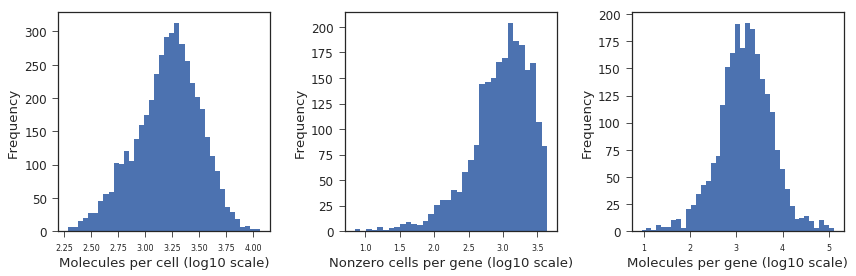

In [4]:
fig, ax = scanalysis.plots.plot.plot_molecules_per_cell_and_gene(df)

In [5]:
# Minimum molecules/cell value
CELL_MIN = 0

# Maximum molecules/cell values
CELL_MAX = 1000000

# Minimum number of nonzero cells/gene 
# (None if no filtering desired)
GENE_NONZERO = None

# Minimum number of molecules/gene
# (None if no filtering desired)
GENE_MOLECULES = None

In [7]:
df = scanalysis.io.preprocess.filter_scseq_data(df, filter_cell_min=CELL_MIN, filter_cell_max=CELL_MAX, 
                         filter_gene_nonzero=GENE_NONZERO, filter_gene_mols=GENE_MOLECULES)

Successfully filtered data


### Data normalization

In [8]:
data = scanalysis.io.preprocess.normalize_scseq_data(df)

Successfully normalized data


### Principal Component Analysis (PCA)

In [ ]:
r1, r2 = scanalysis.utils.pca.run_pca(df, random = False)

s1, s2 = scanalysis.utils.pca.run_pca(df)
r1.head(n = 5)

In [ ]:
s1.head(n = 5)

##### *Note: This sample dataset is especially sensitive, so we will be using the PCA of the original Wishbone package. (as shown below)

In [ ]:
import wishbone
import os

scdata = wishbone.wb.SCData.from_csv(os.path.expanduser('~/.wishbone/data/sample_scseq_data.csv'), data_type='sc-seq', normalize=True)
scdata.run_pca()

In [ ]:
from copy import deepcopy
import numpy as np
import pandas as pd

n_pca_components = 5
temp = deepcopy(scdata.data)
temp -= np.min(np.ravel(temp))
temp /= np.max(np.ravel(temp))
temp = pd.DataFrame(np.dot(temp, scdata.pca['loadings'].iloc[:, 0:n_pca_components]),
                    index=scdata.data.index)

In [ ]:
#plt.scatter(temp.loc[:, 2], r1.loc[:, 2])

### Diffusion Maps

In [ ]:
#data = scanalysis.utils.diffusionmap.run_diffusion_map(r1.iloc[:, 0:5])

## still quite confused what exactly is being used for parameter for Wishbone function??? ---> diffusion eigenvectors

In [ ]:
#plt.scatter(scdata.diffusion_eigenvectors.loc[:, 1], scdata.diffusion_eigenvectors.loc[:, 2])

In [ ]:
#plt.scatter(data.loc[:, 1], data.loc[:, 2])

In [ ]:
tempEigvec, tempEigval = scanalysis.utils.diffusionmap.run_diffusion_map(temp)

In [ ]:
temp1

### tSNE

In [ ]:
t = scanalysis.utils.tsne.TSNE()
d = t.fit_transform(temp)

### Saving Data **might need to revise

In [ ]:
scdata.save('mouse_marrow_scdata.p')
scdata = wishbone.wb.SCdata.load('mouse_marrow_scdata.p')

## General Plots

### PCA visualization

Below is from magic's version of the plot_pca_variance_explained function.

In [ ]:
fig, ax = scanalysis.plots.plot.plot_pca_variance_explained(df, n_components=40, random=True)

In [ ]:
r1, r2 = scanalysis.utils.pca.run_pca(data)
t1 = scanalysis.utils.tsne.TSNE()
d1 = t1.fit_transform(r1)

### tSNE visualization

In [ ]:
fig, ax = scanalysis.plots.plot.plot_tsne(d1)

In [ ]:
fig = plt.figure(figsize=[5, 4])
scanalysis.plots.plot.plot_tsne_by_cell_sizes(df,d1, fig = fig)

In [ ]:
fig, ax = scanalysis.plots.plot.plot_gene_expression(data, d, genes = ['CD34', 'GATA2', 'GATA1', 'MPO'])

### Diffusion map visualization

In [ ]:
fig, ax = scanalysis.plots.plot.plot_diffusion_components(d, tempEigvec, tempEigval)

In [ ]:
dmap_corr = scanalysis.plots.plot.run_diffusion_map_correlations(data, tempEigvec)

In [ ]:
scanalysis.plots.plot.plot_gene_component_correlations(dmap_corr)

## Gene Set Enrichment Analysis (GSEA)

## Running Wishbone

In [ ]:
w = scanalysis.tools.wb.wishbone.Wishbone()

In [ ]:
w.wishbone(temp1Eigvec.iloc[:,[1,2]], 'W30258', k=15, l=15, num_waypoints =250, branch=True)

In [ ]:
w.trajectory

#### Trying real Wishbone package... (ignore for now)

In [ ]:
import wishbone
import os

In [ ]:
scdata = wishbone.wb.SCData.from_csv(os.path.expanduser('~/.wishbone/data/sample_scseq_data.csv'), data_type='sc-seq', normalize=True)
scdata

In [ ]:
scdata.run_pca()

In [ ]:
scdata.run_diffusion_map()

In [ ]:
wb = wishbone.wb.Wishbone(scdata)

In [ ]:
wb.run_wishbone(start_cell = 'W76331')

In [ ]:
wb

## Plotting Wishbone Results

In [ ]:
scanalysis.plots.wb_plot.plot_wishbone_on_tsne(w, d)

In [ ]:
vals, fig, ax = scanalysis.plots.wb_plot.plot_marker_trajectory(scdata.data, w, ['CD34', 'GATA1', 'GATA2', 'MPO']);

In [ ]:
scanalysis.plots.wb_plot.plot_marker_heatmap(w, vals)

In [ ]:
scanalysis.plots.wb_plot.plot_marker_heatmap(w, vals, trajectory_range=[0.1, 0.6])

In [ ]:
scanalysis.plots.wb_plot.plot_derivatives(w, vals)

In [ ]:
scanalysis.plots.wb_plot.plot_derivatives(w, vals, trajectory_range=[0.3, 0.6])

## Running MAGIC

In [ ]:
new_data = scanalysis.tools.magic.run_magic(data)

In [ ]:
new_data

#### With original MAGIC package...

In [ ]:
import magic
import os

In [ ]:
scdata = magic.mg.SCData.from_csv(os.path.expanduser('~/scanalysis/data/sample_scseq_data.csv'),data_type='sc-seq', normalize=False)

In [ ]:
scdata = scdata.normalize_scseq_data()

## Plotting MAGIC Results

### Gene-gene scatter plots

#### 2D scatter plot before MAGIC:

In [ ]:
import warnings

In [ ]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')  # catch experimental ipython widget warning
    import seaborn as sns

In [ ]:
sns.color_palette('Set1', 2)

In [ ]:
genes = ['SRRM1', 'TAB2']
plt.scatter(data[genes[0]], data[genes[1]],
                        s=8, c=data['GPX4'], edgecolors='none')

In [ ]:
import magic.magic_gui

In [ ]:
import magic

###### need to fix the color thing (can't keep calling import magic every time just to get color) 
also it doesn't work with import wishbone

In [ ]:
fig, ax = scanalysis.plots.plot.scatter_gene_expression(data, ['SRRM1', 'TAB2'], color = 'GPX4')
ax.set_xlabel('SRRM1')
ax.set_ylabel('TAB2')

In [ ]:
scanalysis.plots.plot.savefig(fig, 'h')

In [ ]:
new_data.head(5)

#### 2D scatter plot after MAGIC:

In [ ]:
fig, ax = scanalysis.plots.plot.scatter_gene_expression(new_data, ['MAGIC SRRM1', 'MAGIC TAB2'], color = 'MAGIC GPX4')
ax.set_xlabel('MAGIC SRRM1')
ax.set_ylabel('MAGIC TAB2')

#### 3D scatter plot before MAGIC:

In [ ]:
fig, ax = scanalysis.plots.plot.scatter_gene_expression(data, ['SRRM1', 'TAB2', 'CBR1'], color='GPX4')
ax.set_xlabel('SRRM1')
ax.set_ylabel('TAB2')
ax.set_zlabel('CBR1')

#### 3D scatter plot after MAGIC:

In [ ]:
fig, ax = scanalysis.plots.plot.scatter_gene_expression(new_data, ['MAGIC SRRM1', 'MAGIC TAB2', 'MAGIC CBR1'], color='MAGIC GPX4')
ax.set_xlabel('MAGIC SRRM1')
ax.set_ylabel('MAGIC TAB2')
ax.set_zlabel('MAGIC CBR1')

### PCA scatter plots

#### PC2 vs PC3 colored by CDH1, VIM, FN1 and ZEB1 (before MAGIC):

In [ ]:
scanalysis.plots.plot.FigureGrid(2).savefig('h')

In [ ]:
gs = gridspec.GridSpec(2,2)
fig = plt.figure(figsize=[15, 12])
genes = ['SRRM1', 'TAB2', 'CBR1', 'GPX4']
for i in range(len(genes)):
    ax = fig.add_subplot(gs[i//2, i%2])
    scanalysis.plots.plot.scatter_gene_expression(data, genes=['PC2', 'PC3'], color=genes[i], fig=fig, ax=ax)

#### PC2 vs PC3 colored by CDH1, VIM, FN1 and ZEB1 (after MAGIC):

### tSNE scatter plots

#### tSNE maps colored by CDH1, VIM, FN1, and ZEB1 (before MAGIC):

#### tSNE maps colored by CDH1, VIM, FN1, and ZEB1 (after MAGIC):

### original MAGIC package....

In [ ]:
fig, ax = scanalysis.plots.plot.scatter_gene_expression(scdata.data, ['SRRM1', 'TAB2'], color = 'GPX4')

In [ ]:
fig, ax = scdata.scatter_gene_expression(['SRRM1', 'TAB2'], color = 'GPX4')
ax.set_xlabel('SRRM1')
ax.set_ylabel('TAB2')

In [ ]:
scdata.run_magic()

In [ ]:
scdata.magic.scatter_gene_expression(['SRRM1', 'TAB2'], color = 'GPX4')

In [ ]:
fig, ax = scdata.scatter_gene_expression(['SRRM1', 'TAB2', 'CBR1'], color='GPX4')
ax.set_xlabel('SRRM1')
ax.set_ylabel('TAB2')
ax.set_zlabel('CBR1')

In [ ]:
fig, ax = scdata.magic.scatter_gene_expression(['SRRM1', 'TAB2', 'CBR1'], color='GPX4')
ax.set_xlabel('SRRM1')
ax.set_ylabel('TAB2')
ax.set_zlabel('CBR1')

# Testing

In [ ]:
import scanalysis

import wishbone
import os


In [ ]:
scdata = wishbone.wb.SCData.from_csv(os.path.expanduser('~/.wishbone/data/sample_scseq_data.csv'), data_type='sc-seq', normalize=True)
scdata

In [ ]:
scdata.run_pca()

In [ ]:
scdata.run_diffusion_map()

In [ ]:
from copy import deepcopy
import numpy as np
import pandas as pd

n_pca_components = 5
temp = deepcopy(scdata.data)
temp -= np.min(np.ravel(temp))
temp /= np.max(np.ravel(temp))
temp = pd.DataFrame(np.dot(temp, scdata.pca['loadings'].iloc[:, 0:n_pca_components]),
                    index=scdata.data.index)

In [ ]:
temp1 = scanalysis.utils.diffusionmap.run_diffusion_map(temp)

# temp1 is the diffusion eigenvectors

In [ ]:
w = scanalysis.tools.wb.wishbone.Wishbone()

In [ ]:
w.wishbone(temp1.iloc[:,[1,2]], 'W30258', k=15, l=15, num_waypoints =250, branch=True)

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
t = scanalysis.utils.tsne.TSNE()
d = t.fit_transform(temp)

In [ ]:
fig, ax = scanalysis.plots.wb_plot.plot_wishbone_on_tsne(w, d)

In [ ]:
w.trajectory.index

In [ ]:
vals, fig, ax = scanalysis.plots.wb_plot.plot_marker_trajectory(scdata.data, w, ['CD34', 'GATA1', 'GATA2', 'MPO']);

In [ ]:
scanalysis.plots.wb_plot.plot_marker_heatmap(w, vals)

In [ ]:
scanalysis.plots.wb_plot.plot_marker_heatmap(w, vals, trajectory_range=[0.1, 0.6])

In [ ]:
scanalysis.plots.wb_plot.plot_derivatives(w, vals)

In [ ]:
scanalysis.plots.wb_plot.plot_derivatives(w, vals, trajectory_range=[0.3, 0.6])

In [ ]:
fig, ax = scanalysis.plots.wb_plot.plot_wishbone_on_tsne(w, scdata.tsne)

In [ ]:
wb = wishbone.wb.Wishbone(scdata)

In [ ]:
#scdata.data.index[100]
wb.run_wishbone('W30258')

In [ ]:
scdata.run_tsne(n_components=5, perplexity=30)

In [ ]:
fig, ax = wb.plot_wishbone_on_tsne()

In [ ]:
vals, fig, ax = wb.plot_marker_trajectory(['CD34', 'GATA1', 'GATA2', 'MPO']);

In [ ]:
wb.plot_marker_heatmap(vals)

In [ ]:
x = 1

In [ ]:
y = deepcopy(x)

In [ ]:
x = 2

In [ ]:
y

In [ ]:
wb.branch

In [ ]:
wb.waypoints

In [ ]:
list(temp.index[w.waypoints])

In [ ]:
scdata.data.ix[w.trajectory.index, 'CD34']